<a href="https://colab.research.google.com/github/hosankang/AI_Class/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                        "Sandal",     "Shirt",  "Sneaker", "Bag",  "Ankle boot"]

#데이터 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

#레이어 설정(크기 28, 28, relu Activation)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])


4423680/4422102 [==============================] - 0s 0us/step


W0722 06:56:11.405784 139941814146944 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
#컴파일(Adam Optimizer, Cross Entropy)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련
model.fit(x_train, y_train,batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5236 - acc: 0.8174
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3875 - acc: 0.8630
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3459 - acc: 0.8756
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3211 - acc: 0.8830
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3036 - acc: 0.8879
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2896 - acc: 0.8939
Epoch 7/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.2775 - acc: 0.8976
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2650 - acc: 0.9005
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2558 - acc: 0.9055
Epoch 10/10
60000/60000 [==============================] - 3s 44us/sample - loss: 

In [4]:
# 테스트 셋을 통해 모델 평가 및 정확도
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.8816


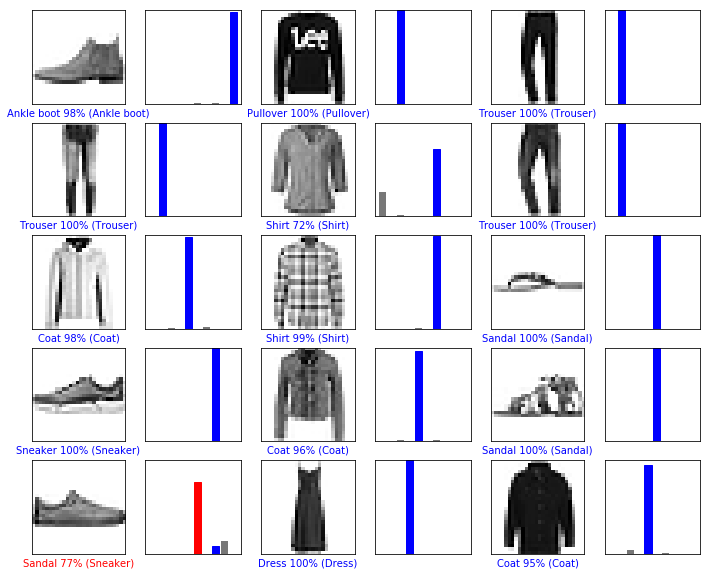

In [5]:
#그래프 정의
predictions = model.predict(x_test)
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(fashion_mnist_labels[predicted_label],
                                100*np.max(predictions_array),
                                fashion_mnist_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

#결과 확인
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()